In [1]:
import copy
import networkx as nx

from regraph.plotting import (plot_graph)
from regraph.primitives import (add_nodes_from, add_edges_from)
from regraph.category_op import pullback_complement, pushout

In [2]:
g = nx.DiGraph()
add_nodes_from(g,
    [
        ('1', {'name': 'EGFR', 'state': 'p'}),
        ('2', {'name': 'BND'}),
        ('3', {'name': 'Grb2', 'aa': 'S', 'loc': 90}),
        ('4', {'name': 'SH2'}),
        ('5', {'name': 'EGFR'}),
        ('6', {'name': 'BND'}),
        ('7', {'name': 'Grb2'}),
        ('8', {'name': 'WAF1'}),
        ('9', {'name': 'BND'}),
        ('10', {'name': 'G1-S/CDK', 'state': 'p'}),
])
edges = [
    ('1', '2', {'s': 'p'}),
    ('4', '2', {'s': 'u'}),
    ('4', '3'),
    ('5', '6', {'s': 'p'}),
    ('7', '6', {'s': 'u'}),
    ('8', '9'),
    ('9', '8'),
    ('10', '8', {"a": {1}}),
    ('10', '9', {"a": {2}}),
    ('5', '2', {'s': 'u'})
]

add_edges_from(g, edges)

In [3]:
lhs = nx.DiGraph()
add_nodes_from(
    lhs,
    [(1, {'state': 'p'}),
     (2, {'name': 'BND'}),
     3,
     4]
)
add_edges_from(
    lhs,
    [(1, 2, {'s': 'p'}),
     (3, 2, {'s': 'u'}),
     (3, 4)]
)

p = nx.DiGraph()
add_nodes_from(p,
    [(1, {'state': 'p'}),
    '1_clone',
    (2, {'name': 'BND'}),
    3,
    4
])
add_edges_from(
    p,
    [(1, 2),
    ('1_clone', 2),
    (3, 4)
])

rhs = nx.DiGraph()
add_nodes_from(
    rhs,
    [(1, {'state': 'p'}),
    '1_clone',
    (2, {'name': 'BND'}),
    3,
    4,
    5
])

add_edges_from(
    rhs,
    [(1, 2, {'s': 'u'}),
    ('1_clone', 2),
    (2, 4),
    (3, 4),
    (5, 3)
])

p_lhs = {1: 1, '1_clone': 1, 2: 2, 3: 3, 4: 4}
p_rhs = {1: 1, '1_clone': '1_clone', 2: 2, 3: 3, 4: 4}
instance = {1: '1', 2: '2', 3: '4', 4: '3'}

In [4]:
g_m, p_g_m, g_m_g = pullback_complement(p, lhs, g, p_lhs, instance, inplace=False)
assert(id(g) != id(g_m))

In [5]:
g_backup = copy.deepcopy(g)
g_m, p_g_m, g_m_g = pullback_complement(p, lhs, g_backup, p_lhs, instance, inplace=True)
assert(id(g_m) == id(g_backup))

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


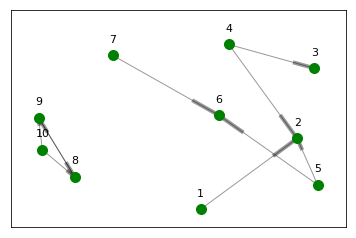

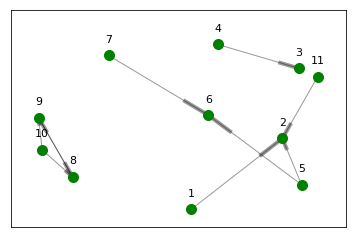

{'1': array([ 0.50264151,  0.        ]),
 '10': array([ 0.01164987,  0.36058139]),
 '11': array([ 0.91797079,  0.80356486]),
 '2': array([ 0.80187978,  0.42958874]),
 '3': array([ 0.85527496,  0.85554545]),
 '4': array([ 0.58994607,  1.        ]),
 '5': array([ 0.86534104,  0.14849062]),
 '6': array([ 0.55837289,  0.57087175]),
 '7': array([ 0.23034701,  0.93331009]),
 '8': array([ 0.11246235,  0.19472935]),
 '9': array([ 0.        ,  0.55489249])}

In [6]:
pos = plot_graph(g)
plot_graph(g_backup, parent_pos=pos)

In [7]:
g_prime, g_m_g_prime, rhs_g_prime =\
    pushout(p, g_backup, rhs, p_g_m, p_rhs, inplace=False)
assert(id(g_prime) != id(g_backup))

In [8]:
g_prime, g_m_g_prime, rhs_g_prime =\
    pushout(p, g_backup, rhs, p_g_m, p_rhs, inplace=True)
assert(id(g_prime) == id(g_backup))

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


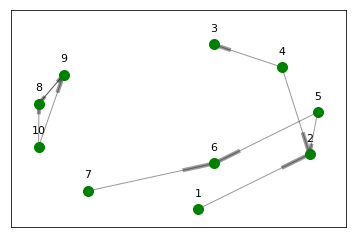

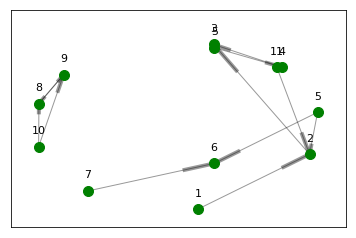

{'1': array([ 0.57084095,  0.        ]),
 '2': array([ 0.97119913,  0.33342353]),
 '3': array([ 0.62751625,  0.99828284]),
 '4': array([ 0.87204102,  0.86077224]),
 '5': array([ 1.        ,  0.58728498]),
 '6': array([ 0.62934045,  0.2773506 ]),
 '7': array([ 0.17704797,  0.1105529 ]),
 '8': array([ 0.0011807 ,  0.64025972]),
 '9': array([ 0.08944292,  0.81485009]),
 '10': array([ 0.        ,  0.37836941]),
 '11': array([ 0.85393477,  0.8597562 ]),
 5: array([ 0.63009571,  0.97883217])}

In [9]:
pos = plot_graph(g)
plot_graph(g_backup, parent_pos=pos)